In [8]:
# Importing necessary libraries
import pandas as pd                # For data manipulation and analysis
import numpy as np                 # For numerical computations
import re                          # For regular expressions, used for text cleaning
import nltk                        # Natural Language Toolkit for text preprocessing
import seaborn as sns              # For data visualization
import matplotlib.pyplot as plt    # For plotting
from sklearn.model_selection import train_test_split  # To split the data into training and test sets
from sklearn.feature_extraction.text import CountVectorizer  # To convert text data into numerical features
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes model for classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For model evaluation

# Download the stopwords (only needs to be run once)
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rkhus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# View the first few rows of the dataset to understand its structure
print(df.head())

# Check for missing values in the dataset
print(df.isnull().sum())

   user id   Platform Sentiment  \
0      352     Amazon   Neutral   
1     8312  Microsoft  Negative   
2     4371      CS-GO  Negative   
3     4433     Google   Neutral   
4     6273       FIFA  Negative   

                                               text   
0  BBC News - Amazon boss Jeff Bezos rejects clai...  
1  @Microsoft Why do I pay for WORD when it funct...  
2  CSGO matchmaking is so full of closet hacking,...  
3  Now the President is slapping Americans in the...  
4  Hi @EAHelp I’ve had Madeleine McCann in my cel...  
user id      0
Platform     0
Sentiment    0
text         0
dtype: int64


In [11]:
# Remove duplicate rows from the dataset
df.drop_duplicates(inplace=True)

In [12]:
# Function to clean the text data
def clean_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove user mentions (@username) and hashtags (#hashtag)
    text = re.sub(r'\@\w+|\#','', text)
    # Remove punctuation and numbers
    text = re.sub(r'\d+', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Remove stopwords (e.g., 'the', 'is', 'in')
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [13]:
# Apply the text cleaning function to the correct column (replace 'text_column' with the actual column name)
df['cleaned_text'] = df['text '].apply(lambda x: clean_text(x))

# View the cleaned text data
print(df[['text ', 'cleaned_text']].head())

                                               text   \
0  BBC News - Amazon boss Jeff Bezos rejects clai...   
1  @Microsoft Why do I pay for WORD when it funct...   
2  CSGO matchmaking is so full of closet hacking,...   
3  Now the President is slapping Americans in the...   
4  Hi @EAHelp I’ve had Madeleine McCann in my cel...   

                                        cleaned_text  
0  bbc news - amazon boss jeff bezos rejects clai...  
1            pay word functions poorly chromebook? 🙄  
2  csgo matchmaking full closet hacking, truly aw...  
3  president slapping americans face really commi...  
4  hi i’ve madeleine mccann cellar past years lit...  


In [14]:
# Convert text data into numerical features using CountVectorizer
vectorizer = CountVectorizer(max_features=1000, stop_words='english')  # Limit to 1000 most frequent words
X = vectorizer.fit_transform(df['cleaned_text']).toarray()  # Converting the cleaned text to feature vectors

In [15]:
# Define target variable (y) and split data into training and testing sets
y = df['Sentiment']  # Assuming the 'Sentiment' column has the labels for classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Train the model (Multinomial Naive Bayes)
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)


In [17]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 48.50%


In [18]:
# Generate a classification report (precision, recall, F1-score)
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.48      0.35      0.41        37
    Negative       0.49      0.52      0.50        52
     Neutral       0.56      0.46      0.50        59
    Positive       0.43      0.58      0.49        52

    accuracy                           0.48       200
   macro avg       0.49      0.48      0.48       200
weighted avg       0.49      0.48      0.48       200



In [19]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[13  9  3 12]
 [ 6 27  7 12]
 [ 7  9 27 16]
 [ 1 10 11 30]]


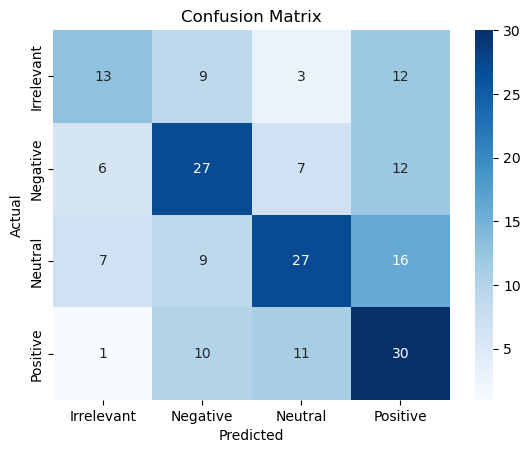

In [20]:
# Visualize the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()